In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [2]:
player_ids = pd.read_csv('files/SFBB Player ID Map - PLAYERIDMAP.csv')
player_ids = player_ids[['MLBNAME', 'MLBID']].copy()
display([(i, player_ids[i].dtype) for i in player_ids.columns])
player_ids = player_ids.dropna(subset=['MLBID']).copy()
player_ids['MLBID'] = player_ids['MLBID'].astype('int64')
display([(i, player_ids[i].dtype) for i in player_ids.columns])
batter_names = player_ids.drop_duplicates(subset='MLBID').set_index('MLBID')['MLBNAME']

[('MLBNAME', dtype('O')), ('MLBID', dtype('float64'))]

[('MLBNAME', dtype('O')), ('MLBID', dtype('int64'))]

In [3]:
savant_2024 = pd.read_csv('files/2024/savantdata-2024.csv')
savant_2023 = pd.read_csv('files/2023/savantdata-2023.csv')

In [4]:
savant_2024['batter_name'] = savant_2024['batter'].map(batter_names)
print("Missing names:", savant_2024['batter_name'].isna().sum())
print("Total rows:", len(savant_2024))

savant_2023['batter_name'] = savant_2023['batter'].map(batter_names)
print("Missing names:", savant_2023['batter_name'].isna().sum())
print("Total rows:", len(savant_2023))

Missing names: 5057
Total rows: 705728
Missing names: 7082
Total rows: 755734


In [5]:
savant_2024.loc[:, 'pitch_uid'] = (savant_2024['game_pk'].astype(str) + '_' + savant_2024['at_bat_number'].astype(str) + '_' + savant_2024['pitch_number'].astype(str))
savant_2024 = savant_2024.drop_duplicates(subset=['pitch_uid'])

savant_2023.loc[:, 'pitch_uid'] = (savant_2023['game_pk'].astype(str) + '_' + savant_2023['at_bat_number'].astype(str) + '_' + savant_2023['pitch_number'].astype(str))
savant_2023 = savant_2023.drop_duplicates(subset=['pitch_uid'])

In [6]:
savant_2024

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name,pitch_uid
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,X,6.0,ground_ball,2,2,2024,-0.96,0.99,0.67,3.00,NaN,642201.0,NaN,2,9,Bot,112.78,146.97,NaN,NaN,NaN,NaN,9.893410,-141.548522,-1.857108,-15.148286,30.423852,-18.544662,3.43,1.54,5.0,87.6,-30.0,99.9,2196.0,7.6,747139,682626,624413,657193,578428,596019,607043,621438,516782,52.91,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,5,4-Seam Fastball,7,8,7,8,8,7,7,8,Standard,Strategic,232.0,-0.142,-0.248,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,6.149605,12.090516,22.160400,45.805662,22.048373,Travis d'Arnaud,747139_82_5
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,1,2,2024,0.20,0.61,0.75,1.20,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.952856,-131.970548,-5.159843,1.012613,25.103830,-24.224355,3.47,1.52,NaN,NaN,NaN,92.9,2209.0,7.3,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,201.0,0.000,0.037,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,NaN,NaN,NaN,NaN,NaN,Travis d'Arnaud,747139_82_4
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,S,NaN,NaN,1,1,2024,0.12,0.35,0.66,1.61,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.757602,-132.670539,-3.857177,0.114032,25.108326,-27.443443,3.43,1.54,NaN,NaN,NaN,93.5,2302.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,3,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,210.0,0.000,-0.060,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,23.541699,-27.093819,34.778701,45.227965,45.368412,Travis d'Arnaud,747139_82_3
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,0,1,2024,0.21,0.63,0.61,1.18,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.385514,-132.826939,-5.397765,1.181254,26.329685,-23.817729,3.47,1.54,NaN,NaN,NaN,93.5,2227.0,7.

In [7]:
display(savant_2024.shape)
display(savant_2024.head())

display(savant_2023.shape)
display(savant_2023.head())

(705728, 120)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name,pitch_uid
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,NaN,NaN,NaN,NaN,3.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,X,6.0,ground_ball,2,2,2024,-0.96,0.99,0.67,3.00,NaN,642201.0,NaN,2,9,Bot,112.78,146.97,NaN,NaN,NaN,NaN,9.893410,-141.548522,-1.857108,-15.148286,30.423852,-18.544662,3.43,1.54,5.0,87.6,-30.0,99.9,2196.0,7.6,747139,682626,624413,657193,578428,596019,607043,621438,516782,52.91,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,5,4-Seam Fastball,7,8,7,8,8,7,7,8,Standard,Strategic,232.0,-0.142,-0.248,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,6.149605,12.090516,22.160400,45.805662,22.048373,Travis d'Arnaud,747139_82_5
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,1,2,2024,0.20,0.61,0.75,1.20,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.952856,-131.970548,-5.159843,1.012613,25.103830,-24.224355,3.47,1.52,NaN,NaN,NaN,92.9,2209.0,7.3,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,201.0,0.000,0.037,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,NaN,NaN,NaN,NaN,NaN,Travis d'Arnaud,747139_82_4
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,NaN,NaN,NaN,NaN,9.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,S,NaN,NaN,1,1,2024,0.12,0.35,0.66,1.61,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.757602,-132.670539,-3.857177,0.114032,25.108326,-27.443443,3.43,1.54,NaN,NaN,NaN,93.5,2302.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,3,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,210.0,0.000,-0.060,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,23.541699,-27.093819,34.778701,45.227965,45.368412,Travis d'Arnaud,747139_82_3
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,NaN,NaN,NaN,NaN,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,0,1,2024,0.21,0.63,0.61,1.18,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,NaN,NaN,NaN,6.385514,-132.826939,-5.397765,1.181254,26.329685,-23.817729,3.47,1.54,NaN,NaN,NaN,93.5,2227.0,7.

(755734, 120)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name,pitch_uid
0,FF,2023-09-30,96.1,-2.08,5.57,"Smith, Drew",664761,622098,field_out,hit_into_play,NaN,NaN,NaN,NaN,11.0,Alec Bohm pops out softly to third baseman Bre...,R,R,R,NYM,PHI,X,5.0,popup,1,2,2023,-0.55,1.64,-1.20,3.23,NaN,NaN,NaN,2,9,Top,121.71,171.57,NaN,NaN,NaN,NaN,3.578635,-139.758276,-4.248165,-8.064461,34.855091,-9.980077,3.56,1.61,78.0,58.8,70.0,95.1,2479.0,6.0,716393,682626,668901,641645,683146,677595,641796,542364,621466,54.53,0.001,0.0,0.0,1.0,0.0,0.0,1.0,78,5,4-Seam Fastball,11,4,4,11,4,11,4,11,Standard,Standard,212.0,0.0,-0.191,65.2,6.5,0.001,0.191,88.0,7,-7,1.0,0.0,29,26,30,27,1,4,3.0,2.0,NaN,1.0,0.85,0.55,0.55,41.2,3.927688,-4.789372,26.542934,22.722870,27.035563,Alec Bohm,716393_78_5
1,FF,2023-09-30,96.5,-1.94,5.59,"Smith, Drew",664761,622098,NaN,foul,NaN,NaN,NaN,NaN,5.0,Alec Bohm pops out softly to third baseman Bre...,R,R,R,NYM,PHI,S,NaN,NaN,1,2,2023,-0.70,1.54,0.04,2.80,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,NaN,NaN,6.829765,-140.272832,-5.266708,-10.851535,36.223954,-10.893420,3.56,1.61,224.0,76.4,24.0,95.3,2386.0,6.0,716393,682626,668901,641645,683146,677595,641796,542364,621466,54.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,4,4-Seam Fastball,11,4,4,11,4,11,4,11,Standard,Standard,209.0,0.0,0.000,71.8,6.7,NaN,0.000,88.0,7,-7,1.0,0.0,29,26,30,27,1,4,3.0,2.0,NaN,1.0,0.94,0.70,0.70,39.9,-3.605011,22.334437,30.108874,38.070276,16.124341,Alec Bohm,716393_78_4
2,SL,2023-09-30,86.6,-1.91,5.54,"Smith, Drew",664761,622098,NaN,ball,NaN,NaN,NaN,NaN,14.0,Alec Bohm pops out softly to third baseman Bre...,R,R,R,NYM,PHI,B,NaN,NaN,0,2,2023,0.48,-0.11,1.24,1.57,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,NaN,NaN,6.520046,-125.979293,-2.991978,3.621691,27.644167,-32.919030,3.59,1.64,NaN,NaN,NaN,85.9,2610.0,6.0,716393,682626,668901,641645,683146,677595,641796,542364,621466,54.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,3,Slider,11,4,4,11,4,11,4,11,Standard,Standard,114.0,0.0,0.022,NaN,NaN,NaN,-0.022,NaN,7,-7,1.0,0.0,29,26,30,27,1,4,3.0,2.0,NaN,1.0,3.17,-0.48,-0.48,43.8,NaN,NaN,NaN,NaN,NaN,Alec Bohm,716393_78_3
3,SL,2023-09-30,87.1,-2.01,5.55,"Smith, Drew",664761,622098,NaN,swinging_strike,NaN,NaN,NaN,NaN,14.0,Alec Bohm pops out softly to third baseman Bre...,R,R,R,NYM,PHI,S,NaN,NaN,0,1,2023,0.68,0.07,0.16,0.55,NaN,NaN,NaN,2,9,Top,NaN,NaN,NaN,NaN,NaN,NaN,3.789457,-126.654205,-5.857496,6.307104,29.537217,-30.340443,3.56,1.61,NaN,NaN,NaN,86.2,2776.0,6.1,716393,682626,668901,641645,683146,677595,641796,54

In [8]:
display(savant_2024.columns[savant_2024.isna().sum() / len(savant_2024) >= 0.9])
old_system_cols = ['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire']

savant_2024 = savant_2024.drop(columns = old_system_cols).copy()
savant_2024 = savant_2024.dropna(axis=0, subset=['pitch_type', 'zone']).copy()

savant_2023 = savant_2023.drop(columns = old_system_cols).copy()
savant_2023 = savant_2023.dropna(axis=0, subset=['pitch_type', 'zone']).copy()

Index(['spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated',
       'break_length_deprecated', 'on_3b', 'tfs_deprecated',
       'tfs_zulu_deprecated', 'umpire', 'sv_id'],
      dtype='object')

In [9]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter'].map(batter_names).astype('object')
savant_2023.loc[:, 'batter_name'] = savant_2023['batter'].map(batter_names).astype('object')
savant_2024['batter_name']

0          Travis d'Arnaud
1          Travis d'Arnaud
2          Travis d'Arnaud
3          Travis d'Arnaud
4          Travis d'Arnaud
                ...       
705723       Brenton Doyle
705724      Ezequiel Tovar
705725      Ezequiel Tovar
705726      Ezequiel Tovar
705727    Charlie Blackmon
Name: batter_name, Length: 705443, dtype: object

In [10]:
savant_2024.loc[:, 'batter_name'] = savant_2024['batter_name'].fillna('Unknown Batter')
savant_2023.loc[:, 'batter_name'] = savant_2023['batter_name'].fillna('Unknown Batter')

savant_2024

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,batter_name,pitch_uid
0,FF,2024-09-30,97.4,-2.10,4.88,"Díaz, Edwin",518595,621242,field_out,hit_into_play,3.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,X,6.0,ground_ball,2,2,2024,-0.96,0.99,0.67,3.00,NaN,642201.0,NaN,2,9,Bot,112.78,146.97,NaN,9.893410,-141.548522,-1.857108,-15.148286,30.423852,-18.544662,3.43,1.54,5.0,87.6,-30.0,99.9,2196.0,7.6,747139,682626,624413,657193,578428,596019,607043,621438,516782,52.91,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,5,4-Seam Fastball,7,8,7,8,8,7,7,8,Standard,Strategic,232.0,-0.142,-0.248,68.8,7.3,0.059,0.248,88.0,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,1.40,0.96,0.96,17.6,6.149605,12.090516,22.160400,45.805662,22.048373,Travis d'Arnaud,747139_82_5
1,SL,2024-09-30,90.7,-2.14,5.06,"Díaz, Edwin",518595,621242,NaN,ball,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,1,2,2024,0.20,0.61,0.75,1.20,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,6.952856,-131.970548,-5.159843,1.012613,25.103830,-24.224355,3.47,1.52,NaN,NaN,NaN,92.9,2209.0,7.3,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,4,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,201.0,0.000,0.037,NaN,NaN,NaN,-0.037,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.14,-0.20,-0.20,23.1,NaN,NaN,NaN,NaN,NaN,Travis d'Arnaud,747139_82_4
2,SL,2024-09-30,91.1,-2.07,5.14,"Díaz, Edwin",518595,621242,NaN,swinging_strike,9.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,S,NaN,NaN,1,1,2024,0.12,0.35,0.66,1.61,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,6.757602,-132.670539,-3.857177,0.114032,25.108326,-27.443443,3.43,1.54,NaN,NaN,NaN,93.5,2302.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,3,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,210.0,0.000,-0.060,71.2,8.9,NaN,0.060,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.0,1.0,2.37,-0.12,-0.12,22.4,23.541699,-27.093819,34.778701,45.227965,45.368412,Travis d'Arnaud,747139_82_3
3,SL,2024-09-30,91.3,-2.05,5.07,"Díaz, Edwin",518595,621242,NaN,ball,14.0,"Travis d'Arnaud grounds out, shortstop Francis...",R,R,R,ATL,NYM,B,NaN,NaN,0,1,2024,0.21,0.63,0.61,1.18,NaN,642201.0,NaN,2,9,Bot,NaN,NaN,NaN,6.385514,-132.826939,-5.397765,1.181254,26.329685,-23.817729,3.47,1.54,NaN,NaN,NaN,93.5,2227.0,7.4,747139,682626,624413,657193,578428,596019,607043,621438,516782,53.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,2,Slider,7,8,7,8,8,7,7,8,Standard,Strategic,212.0,0.000,0.012,NaN,NaN,NaN,-0.012,NaN,-1,-1,0.142,0.142,30,35,30,35,1,4,1.0,1.0,3.

In [11]:
batter_cols = ["batter_name", "game_date", "pitch_type", "player_name", "batter", "stand", "p_throws", 
               "release_speed", "pfx_x", "pfx_z", "plate_x", "plate_z", 
               "attack_angle", "launch_angle", "launch_speed", "bat_speed", "swing_path_tilt", 
               "attack_direction", "intercept_ball_minus_batter_pos_x_inches", "intercept_ball_minus_batter_pos_y_inches", 
               "events", "description", "zone", "hit_location", "bb_type", "balls", "strikes", "outs_when_up", 
               "hc_x", "hc_y", "sz_top", "sz_bot", "hit_distance_sc", 
               "estimated_ba_using_speedangle", "estimated_woba_using_speedangle", "woba_value", "woba_denom", "babip_value", "iso_value",
               "launch_speed_angle", "at_bat_number", "delta_run_exp", "swing_length", "estimated_slg_using_speedangle", "age_bat", 
               "if_fielding_alignment", "of_fielding_alignment",
               "n_thruorder_pitcher"
               ]

batter_data_2024 = savant_2024[batter_cols].copy()
batter_data_2023 = savant_2023[batter_cols].copy()
batter_data = pd.concat([batter_data_2024, batter_data_2023]).reset_index(drop=True).copy()

In [76]:

batter_data.loc[:, 'year'] = pd.to_datetime(
    batter_data['game_date'],
    format='%Y-%m-%d'
).dt.year

In [77]:
batter_data

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,year
0,Travis d'Arnaud,2024-09-30,FF,"Díaz, Edwin",518595,R,R,97.4,-0.96,0.99,0.67,3.00,6.149605,-30.0,87.6,68.8,22.160400,12.090516,45.805662,22.048373,field_out,hit_into_play,3.0,6.0,ground_ball,2,2,2,112.78,146.97,3.43,1.54,5.0,0.049,0.052,0.0,1.0,0.0,0.0,2.0,82,-0.248,7.3,0.059,35,Standard,Strategic,1,2024
1,Travis d'Arnaud,2024-09-30,SL,"Díaz, Edwin",518595,R,R,90.7,0.20,0.61,0.75,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,14.0,NaN,NaN,1,2,2,NaN,NaN,3.47,1.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,0.037,NaN,NaN,35,Standard,Strategic,1,2024
2,Travis d'Arnaud,2024-09-30,SL,"Díaz, Edwin",518595,R,R,91.1,0.12,0.35,0.66,1.61,23.541699,NaN,NaN,71.2,34.778701,-27.093819,45.227965,45.368412,NaN,swinging_strike,9.0,NaN,NaN,1,1,2,NaN,NaN,3.43,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,-0.060,8.9,NaN,35,Standard,Strategic,1,2024
3,Travis d'Arnaud,2024-09-30,SL,"Díaz, Edwin",518595,R,R,91.3,0.21,0.63,0.61,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,14.0,NaN,NaN,0,1,2,NaN,NaN,3.47,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,0.012,NaN,NaN,35,Standard,Strategic,1,2024
4,Travis d'Arnaud,2024-09-30,SL,"Díaz, Edwin",518595,R,R,89.1,0.17,0.66,1.36,1.78,23.112048,NaN,NaN,71.7,33.038132,-30.629825,53.011806,51.686541,NaN,swinging_strike,14.0,NaN,NaN,0,0,2,NaN,NaN,3.43,1.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,-0.040,9.0,NaN,35,Standard,Standard,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451143,Chris Taylor,2023-03-20,FF,"Hughes, Gabriel",621035,R,R,95.4,-0.21,1.13,0.52,3.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,3.0,NaN,NaN,0,0,1,NaN,NaN,3.47,1.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.039,NaN,NaN,33,Infield shade,Standard,1,2023
1451144,David Peralta,2023-03-20,SL,"Hughes, Gabriel",444482,L,R,87.6,0.56,-0.11,0.40,2.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strikeout,called_strike,6.0,2.0,NaN,1,2,0,NaN,NaN,3.58,1.62,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,1,-0.193,NaN,NaN,36,Infield shade,Standard,1,2023
1451145,David Peralta,2023-03-20,FF,"Hughes, Gabriel",444482,L,R,95.3,-0.16,1.08,1.01,2.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,called_strike,14.0,NaN,NaN,1,1,0,NaN,NaN,3.69,1.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-0.061,NaN,NaN,36,Infield shade,Standard,1,2023
1451146,David Peralta,2023-03-20,FF,"Hughes, Gabriel",444482,L,R,94.9,0.00,1.18,0.25,4.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball,12.0,NaN,NaN,0,1,0,NaN,NaN,3.60,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.031,NaN,NaN,36,Infield shade,Standard,1,2023


In [80]:
Tatis = batter_data[(batter_data["batter_name"] == "Fernando Tatis Jr.") & (batter_data["year"] == 2024)]
Tatis_swing = Tatis[~Tatis["attack_angle"].isna()]
Z_st = Tatis_swing[Tatis_swing["strikes"] == 0].sort_values(by = "bb_type")
ZZ_st = Tatis_swing[(Tatis_swing["strikes"] == 0)& (Tatis_swing["balls"] == 0)].sort_values(by = "bb_type")
T_st = Tatis_swing[Tatis_swing["strikes"] == 2].sort_values(by = "bb_type")

In [81]:
Z_st_whiff = (Z_st['description'] == 'swinging_strike').astype(int)
Z_st_contact = 1 - (Z_st_whiff.sum() / Z_st.shape[0])
Z_st_contact


np.float64(0.7394366197183099)

In [82]:
ZZ_st_whiff = (ZZ_st['description'] == 'swinging_strike').astype(int)
ZZ_st_contact = 1 - (ZZ_st_whiff.sum() / ZZ_st.shape[0])
ZZ_st_contact

np.float64(0.7081081081081081)

In [83]:
T_st_whiff = (T_st['description'] == 'swinging_strike').astype(int)
T_st_contact = 1 - (T_st_whiff.sum() / T_st.shape[0])
T_st_contact

np.float64(0.7408906882591093)

<Axes: xlabel='attack_angle', ylabel='attack_direction'>

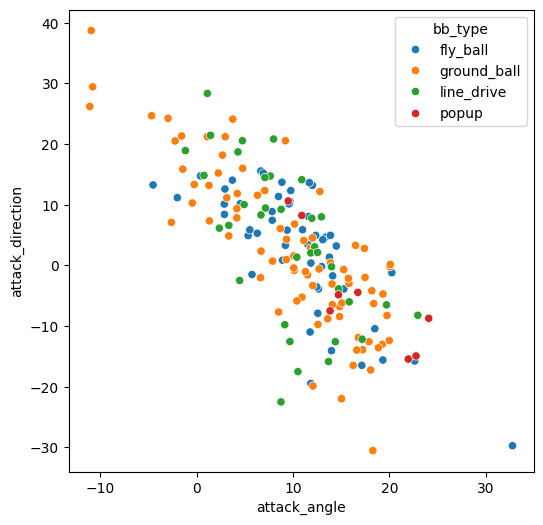

In [55]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=Z_st, x='attack_angle', y="attack_direction" , hue = "bb_type") 

<Axes: xlabel='attack_angle', ylabel='attack_direction'>

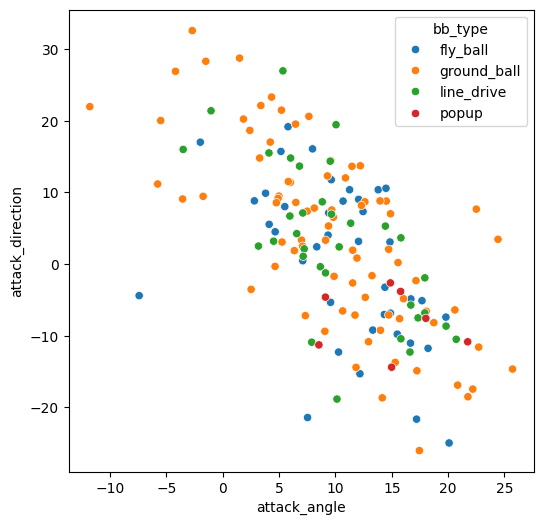

In [56]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=T_st, x='attack_angle', y="attack_direction" ,hue = "bb_type") 

In [ ]:
mask = (
    (batter_data["balls"]   == 0) 
  & (batter_data["strikes"] == 0)
)
filtered = batter_data[mask]
qualified  = filtered.groupby("batter_name").count()
qualified = qualified[qualified["pitch_type"] >= (502*2)]
qualified_batters = qualified.index.to_list()
qualified_df = batter_data[batter_data["batter_name"].isin(qualified_batters)].reset_index(drop=True).copy()

non_swings = ['ball', 'blocked_ball', 'called_strike', 'hit_by_pitch', 'pitchout']
qualified_df = qualified_df[~qualified_df['description'].isin(non_swings)].reset_index(drop=True).copy()



In [14]:
qualified_df['description'].unique()

array(['hit_into_play', 'swinging_strike', 'foul',
       'swinging_strike_blocked', 'foul_tip', 'foul_bunt', 'missed_bunt',
       'bunt_foul_tip'], dtype=object)

In [15]:
qualified_df.loc[:, 'whiff'] = (qualified_df['description'] == 'swinging_strike').astype(int)
qualified_df.loc[:, 'foul'] = ((qualified_df['description'] == 'foul') |
                                           (qualified_df['description'] == 'foul_tip') | 
                                           (qualified_df['description'] == 'foul_bunt') |
                                           (qualified_df['description'] == 'bunt_foul_tip')).astype(int)
qualified_df.loc[:, 'inplay'] = (qualified_df['description'] == 'hit_into_play').astype(int)
qualified_df

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,year,whiff,foul,inplay
0,Matt Olson,2024-09-30,FF,"Díaz, Edwin",621566,L,R,94.2,-1.11,1.20,0.84,2.93,19.556424,58.0,76.1,77.4,36.395467,-13.249187,27.056603,30.890146,field_out,hit_into_play,12.0,6.0,popup,0,0,0,121.61,125.27,3.41,1.68,189.0,0.037,0.039,0.0,1.0,0.0,0.0,3.0,79,-0.254,7.0,0.049,30,Strategic,Standard,1,2024,0,0,1
1,Francisco Lindor,2024-09-30,CU,"Johnson, Pierce",596019,L,R,86.4,0.84,-0.19,0.15,1.72,18.194293,35.0,107.2,80.2,40.203398,-6.316046,34.743653,35.039294,home_run,hit_into_play,8.0,NaN,fly_ball,0,0,1,157.02,36.68,3.33,1.52,413.0,0.791,1.621,2.0,1.0,0.0,3.0,6.0,76,1.436,8.1,3.146,31,Standard,Standard,1,2024,0,0,1
2,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.7,0.04,0.39,0.55,2.52,23.407233,NaN,NaN,78.4,32.959287,-21.244835,43.777675,40.352334,strikeout,swinging_strike,6.0,2.0,NaN,3,2,2,NaN,NaN,3.51,1.73,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,73,-0.298,8.1,NaN,34,Standard,Standard,1,2024,1,0,0
3,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.5,0.10,0.37,0.94,1.28,30.284377,NaN,NaN,79.5,38.931011,-27.619390,46.668101,56.727472,NaN,swinging_strike,14.0,NaN,NaN,2,1,2,NaN,NaN,3.51,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.062,8.5,NaN,34,Standard,Standard,1,2024,1,0,0
4,Marcell Ozuna,2024-09-30,FF,"Díaz, Edwin",542303,R,R,96.9,-1.05,0.90,-0.18,2.89,19.668645,86.0,NaN,77.4,31.854643,-12.917086,36.197899,37.759751,NaN,foul,5.0,NaN,NaN,1,0,2,NaN,NaN,3.51,1.73,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.043,8.0,NaN,34,Standard,Standard,1,2024,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272179,Unknown Batter,2023-03-20,FF,"Hughes, Gabriel",669899,L,R,91.8,0.43,0.58,1.80,2.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,swinging_strike,14.0,NaN,NaN,2,1,1,NaN,NaN,3.32,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,-0.076,NaN,NaN,25,Infield shade,Standard,1,2023,1,0,0
272180,Unknown Batter,2023-03-20,SI,"Hughes, Gabriel",669899,L,R,96.5,-1.00,1.21,0.12,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,swinging_strike,8.0,NaN,NaN,0,0,1,NaN,NaN,3.32,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,-0.041,NaN,NaN,25,Infield shade,Standard,1,2023,1,0,0
272181,Brenton Doyle,2023-03-20,FC,"Ferguson, Caleb",686668,R,L,85.9,-0.50,0.14,-0.87,2.57,NaN,26.0,65.9,NaN,NaN,NaN,NaN,NaN,single,hit_into_play,11.0,8.0,line_drive,0,2,1,119.73,119.69,3.49,1.60,197.0,0.900,NaN,0.9,NaN,1.0,0.0,4.0,14,0.591,NaN,0.964,25,Standard,Standard,1,2023,0,0,1
272182,Brenton Doyle,2023-03-20,FF,"Ferguson, Caleb",686668,R,L,95.8,0.45,1.34,-0.02,2.99,NaN,15.0,79.9,NaN,NaN,NaN,NaN,NaN,NaN,foul,2.0,NaN,NaN,0,1,1,NaN,NaN,3.49,1.60,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,-0.065,NaN,NaN,25,Standard,Standard,1,2023,0,1,0


In [16]:
qualified_df = qualified_df[qualified_df['batter_name'] != 'Unknown Batter'].copy()
qualified_df

,batter_name,game_date,pitch_type,player_name,batter,stand,p_throws,release_speed,pfx_x,pfx_z,plate_x,plate_z,attack_angle,launch_angle,launch_speed,bat_speed,swing_path_tilt,attack_direction,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches,events,description,zone,hit_location,bb_type,balls,strikes,outs_when_up,hc_x,hc_y,sz_top,sz_bot,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,delta_run_exp,swing_length,estimated_slg_using_speedangle,age_bat,if_fielding_alignment,of_fielding_alignment,n_thruorder_pitcher,year,whiff,foul,inplay
0,Matt Olson,2024-09-30,FF,"Díaz, Edwin",621566,L,R,94.2,-1.11,1.20,0.84,2.93,19.556424,58.0,76.1,77.4,36.395467,-13.249187,27.056603,30.890146,field_out,hit_into_play,12.0,6.0,popup,0,0,0,121.61,125.27,3.41,1.68,189.0,0.037,0.039,0.0,1.0,0.0,0.0,3.0,79,-0.254,7.0,0.049,30,Strategic,Standard,1,2024,0,0,1
1,Francisco Lindor,2024-09-30,CU,"Johnson, Pierce",596019,L,R,86.4,0.84,-0.19,0.15,1.72,18.194293,35.0,107.2,80.2,40.203398,-6.316046,34.743653,35.039294,home_run,hit_into_play,8.0,NaN,fly_ball,0,0,1,157.02,36.68,3.33,1.52,413.0,0.791,1.621,2.0,1.0,0.0,3.0,6.0,76,1.436,8.1,3.146,31,Standard,Standard,1,2024,0,0,1
2,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.7,0.04,0.39,0.55,2.52,23.407233,NaN,NaN,78.4,32.959287,-21.244835,43.777675,40.352334,strikeout,swinging_strike,6.0,2.0,NaN,3,2,2,NaN,NaN,3.51,1.73,NaN,NaN,0.000,0.0,1.0,0.0,0.0,NaN,73,-0.298,8.1,NaN,34,Standard,Standard,1,2024,1,0,0
3,Marcell Ozuna,2024-09-30,SL,"Díaz, Edwin",542303,R,R,89.5,0.10,0.37,0.94,1.28,30.284377,NaN,NaN,79.5,38.931011,-27.619390,46.668101,56.727472,NaN,swinging_strike,14.0,NaN,NaN,2,1,2,NaN,NaN,3.51,1.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.062,8.5,NaN,34,Standard,Standard,1,2024,1,0,0
4,Marcell Ozuna,2024-09-30,FF,"Díaz, Edwin",542303,R,R,96.9,-1.05,0.90,-0.18,2.89,19.668645,86.0,NaN,77.4,31.854643,-12.917086,36.197899,37.759751,NaN,foul,5.0,NaN,NaN,1,0,2,NaN,NaN,3.51,1.73,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,-0.043,8.0,NaN,34,Standard,Standard,1,2024,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272176,Brenton Doyle,2023-03-20,SI,"Acosta, Aldry",686668,R,R,90.9,-1.32,-0.30,-1.01,2.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,foul,13.0,NaN,NaN,1,1,2,NaN,NaN,3.49,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,-0.060,NaN,NaN,25,Standard,Standard,1,2023,0,1,0
272177,Brenton Doyle,2023-03-20,SI,"Acosta, Aldry",686668,R,R,91.6,-1.27,-0.06,-0.09,1.96,NaN,-48.0,58.4,NaN,NaN,NaN,NaN,NaN,NaN,foul,8.0,NaN,NaN,1,0,2,NaN,NaN,3.49,1.60,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,-0.050,NaN,NaN,25,Standard,Standard,1,2023,0,1,0
272181,Brenton Doyle,2023-03-20,FC,"Ferguson, Caleb",686668,R,L,85.9,-0.50,0.14,-0.87,2.57,NaN,26.0,65.9,NaN,NaN,NaN,NaN,NaN,single,hit_into_play,11.0,8.0,line_drive,0,2,1,119.73,119.69,3.49,1.60,197.0,0.900,NaN,0.9,NaN,1.0,0.0,4.0,14,0.591,NaN,0.964,25,Standard,Standard,1,2023,0,0,1
272182,Brenton Doyle,2023-03-20,FF,"Ferguson, Caleb",686668,R,L,95.8,0.45,1.34,-0.02,2.99,NaN,15.0,79.9,NaN,NaN,NaN,NaN,NaN,NaN,foul,2.0,NaN,NaN,0,1,1,NaN,NaN,3.49,1.60,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,-0.065,NaN,NaN,25,Standard,Standard,1,2023,0,1,0


In [17]:
qualified_df["foul"].sum()

np.int64(108713)

In [18]:
qualified_df = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size',
     'whiff': 'sum',
     'foul': 'sum',
     'inplay': 'sum',
     }).reset_index().copy()

In [19]:
qualified_df

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Aaron Judge,R,2023,0,0,14.630339,-2.844310,42.346809,154,47,48,58
1,Aaron Judge,R,2023,0,1,18.477172,-8.113360,42.323082,80,30,28,22
2,Aaron Judge,R,2023,0,2,13.508203,1.041385,39.825811,34,14,6,13
3,Aaron Judge,R,2023,1,0,17.017514,-6.258862,41.553397,53,17,23,13
4,Aaron Judge,R,2023,1,1,15.012982,-4.319031,43.959248,91,34,30,26
...,...,...,...,...,...,...,...,...,...,...,...,...
3178,Yordan Alvarez,L,2024,2,1,11.590088,-8.314944,33.925010,78,11,35,32
3179,Yordan Alvarez,L,2024,2,2,7.788726,-4.100396,35.702294,99,12,38,46
3180,Yordan Alvarez,L,2024,3,0,9.613233,-2.473902,33.105884,6,1,3,2
3181,Yordan Alvarez,L,2024,3,1,10.257877,-9.767575,34.152981,26,3,13,10


In [20]:
qualified_df.loc[((qualified_df['balls'].isin([0,1,2,3]) ) & (qualified_df['strikes'] == 2))].groupby('year').sum()[["whiff", "foul", "inplay"]]

,whiff,foul,inplay
year,,,
2023,9548,20926,19269
2024,9242,20872,18848


In [21]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    # 1) keep only this batter’s 0-0 and 2-strike counts
    df = df[(df['batter_name'] == name) & 
            (
              ((df['balls'] == 0) & (df['strikes'] == 0)) |
              ((df['balls'].isin([0,1,2,3])) & (df['strikes'] == 2))
            )
           ].copy()

    # 2) compute your percentages as before
    df[["whiff","foul","inplay"]] = (
        df[["whiff","foul","inplay"]]
        .apply(lambda x: x / df["pitch_type"] * 100)
    )

    # 3) collapse all 2-strike rows **per year+stand**
    two = df[df['strikes'] == 2]
    combined = []
    for (yr, st), sub in two.groupby(['year', 'stand']):
        total = sub['pitch_type'].sum()
        wh = (sub['whiff']  * sub['pitch_type']).sum() / total
        fo = (sub['foul']   * sub['pitch_type']).sum() / total
        ip = (sub['inplay'] * sub['pitch_type']).sum() / total

        # template row
        row = sub.iloc[0].copy()
        row['pitch_type'] = total
        row['whiff']      = wh
        row['foul']       = fo
        row['inplay']     = ip
        row['balls']      = 'all'   # mark that it’s aggregated

        combined.append(row)

    # 4) drop the old 2-strike rows, append the new one-per-(year,stand)
    df = pd.concat([df[df['strikes'] != 2], pd.DataFrame(combined)], ignore_index=True)

    return df.reset_index(drop=True)


In [22]:
import random
batter_ex = player_filter(qualified_df, random.choice(qualified_batters))

"""plt.figure(figsize=(6, 6))
sns.scatterplot(data=batter_ex, x='attack_direction', y='whiff',hue = "strikes")
plt.show()"""
batter_ex

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Brandon Nimmo,L,2023,0,0,5.801217,0.063726,28.805826,177,22.033898,39.548023,37.853107
1,Brandon Nimmo,L,2024,0,0,6.977866,-0.013897,28.603744,234,19.658120,44.444444,34.615385
2,Brandon Nimmo,L,2023,all,2,2.016866,9.308608,27.399121,548,14.416058,44.525547,39.963504
3,Brandon Nimmo,L,2024,all,2,4.156449,1.388865,28.809218,510,18.823529,44.117647,35.098039


In [23]:
player_filter(qualified_df, 'Isaac Paredes')


,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type,whiff,foul,inplay
0,Isaac Paredes,R,2023,0,0,17.496673,-19.524658,32.321945,135,14.074074,55.555556,29.629630
1,Isaac Paredes,R,2024,0,0,18.826584,-23.051268,31.395078,128,21.875000,53.906250,24.218750
2,Isaac Paredes,R,2023,all,2,13.051109,-14.626833,34.549989,489,14.110429,43.558282,39.059305
3,Isaac Paredes,R,2024,all,2,11.749421,-9.228163,31.153240,591,10.321489,50.761421,38.071066


In [33]:
import pandas as pd

def compute_count_deltas(df, group_cols=None):
    """
    For each batter/stand/(year), compute the difference
    between the 2-strike (balls='all', strikes=2) metrics
    and the 0-0 count metrics.

    Parameters
    ----------
    df : pd.DataFrame
      Must contain columns ['balls','strikes'] plus your metrics.
    group_cols : list[str], optional
      Keys to identify each “panel” — by default
      ['batter_name','stand','year'].

    Returns
    -------
    pd.DataFrame
      One row per group with columns:
        group_cols + delta_<metric> for each of
        ['attack_angle','attack_direction',
         'swing_path_tilt','whiff','foul','inplay'].
    """
    if group_cols is None:
        group_cols = ['batter_name','stand','year']
    # 1. compute the 95th‐percentile value
    threshold_1 = df["attack_direction"].quantile(0.975)

    threshold_2 = df["attack_direction"].quantile(0.025)

    df = df[(df["attack_direction"] <= threshold_1)]
    df = df[(df["attack_direction"] >= threshold_2)]

    # 2b. OR, if you instead want to keep only the top 5%:
    # pick off the two count‐types
    df0 = df[(df['balls']==0) & (df['strikes']==0)]
    df2 = df[(df['balls']=='all') & (df['strikes']==2)]

    # metrics to diff
    metrics = [
        'attack_angle','attack_direction','swing_path_tilt',
        'whiff','foul','inplay'
    ]

    # merge 0-0 and 2-strike side by side
    merged = pd.merge(
        df0[group_cols + metrics],
        df2[group_cols + metrics],
        on=group_cols,
        suffixes=('_0','_2')
    )

    # compute deltas: 2-strike minus 0-0
    for m in metrics:
        merged[f'delta_{m}'] = merged[f'{m}_2'] - merged[f'{m}_0']

    # return only the deltas
    return merged[group_cols + [f'delta_{m}' for m in metrics]]


In [34]:
# first filter to just the hitters you care about (0-0 & 2-strike)
all_players = []
for name in qualified_batters:
    pf = player_filter(qualified_df, name)
    all_players.append(pf)
all_df = pd.concat(all_players, ignore_index=True)

# now compute the within-season, count-based deltas
count_deltas = compute_count_deltas(all_df)

count_deltas


,batter_name,stand,year,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt,delta_whiff,delta_foul,delta_inplay
0,Aaron Judge,R,2023,-1.122136,3.885695,-2.520999,1.163688,8.105096,-9.609532
1,Aaron Judge,R,2024,-1.754687,-0.585959,0.026262,-2.219618,4.203029,-3.260007
2,Adley Rutschman,L,2023,-1.726080,2.233198,-1.998398,-4.767932,10.717300,-7.721519
3,Adley Rutschman,L,2024,-2.535495,4.350529,-0.571921,-0.238398,-10.870947,9.456453
4,Adley Rutschman,R,2023,-5.447947,2.737208,0.304845,-2.194357,-8.620690,8.746082
...,...,...,...,...,...,...,...,...,...
243,Yainer Diaz,R,2024,-1.433272,2.752489,-2.604887,0.467223,1.532598,-2.327146
244,Yandy Diaz,R,2023,3.522026,-5.297049,-1.544985,0.248276,-6.271264,5.268966
245,Yandy Diaz,R,2024,1.566052,-0.885335,-0.692501,1.775873,-1.399445,-0.887936
246,Yordan Alvarez,L,2023,-1.353616,1.335561,-0.354177,-1.422151,11.443018,-11.377207


In [35]:
count_deltas["abs_change"] = count_deltas[["delta_attack_angle","delta_attack_direction", "delta_swing_path_tilt"]].apply(lambda x: x**2).sum(axis=1).apply(lambda x : np.sqrt(x))
test = count_deltas[count_deltas["year"] == 2024].sort_values(by = "abs_change", ascending= False).reset_index(drop = True)
test.set_index("batter_name")[test["batter_name"].value_counts() == 1].reset_index()

/var/folders/6r/152n25q91lzcqtjmm1gt04vc0000gn/T/ipykernel_9894/1170068196.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test.set_index("batter_name")[test["batter_name"].value_counts() == 1].reset_index()


,batter_name,stand,year,delta_attack_angle,delta_attack_direction,delta_swing_path_tilt,delta_whiff,delta_foul,delta_inplay,abs_change
0,Jazz Chisholm,L,2024,-3.162268,8.688721,-3.944496,-7.570293,-1.761547,7.414746,10.052505
1,Fernando Tatis Jr.,R,2024,5.597307,-7.875374,-1.922614,-3.047451,7.804303,-5.906278,9.851284
2,Freddie Freeman,L,2024,-5.547701,7.482672,-3.148690,-1.447620,-2.342788,2.494511,9.832681
3,J.D. Martinez,R,2024,-5.479413,7.960364,-1.686453,-6.188252,-3.965314,8.585696,9.809968
4,Nico Hoerner,R,2024,-3.556544,8.945323,0.314452,-3.986922,-1.825155,7.068854,9.631546
...,...,...,...,...,...,...,...,...,...,...
90,Adolis Garcia,R,2024,-0.135772,1.343692,-0.391638,-9.761905,0.714286,7.100840,1.406173
91,J.P. Crawford,L,2024,-0.584346,0.405102,-0.885004,0.046556,-2.697166,0.142773,1.135253
92,Pete Alonso,R,2024,-0.535640,-0.792919,0.263726,0.536437,5.890688,-7.682186,0.992564
93,Gleyber Torres,R,2024,-0.400825,0.303437,-0.311772,-14.135009,4.980969,8.256373,0.591554


In [61]:
import pandas as pd
import statsmodels.api as sm

# 1) Start from your count_deltas DataFrame:
df = count_deltas.copy()


# +1 for R, −1 for L
df['dir_sign'] = df['stand'].map({'R': 1, 'L': -1})

# flip left-handers
df['signed_delta_attack_direction'] = df['delta_attack_direction'] * df['dir_sign']

# 2) Define entity and variables
df['entity'] = df['batter_name'] + '_' + df['stand']
predictors = ['delta_attack_angle',
              'signed_delta_attack_direction',
              'delta_swing_path_tilt']

outcomes   = ['delta_whiff','delta_foul','delta_inplay']
vars_all   = predictors + outcomes

# 3) Compute the within-transformation:
#    var_within = var − entity_mean(var) − time_mean(var) + overall_mean(var)
entity_means = df.groupby('entity')[vars_all].transform('mean')
time_means   = df.groupby('year')[vars_all].transform('mean')
overall_means = df[vars_all].mean()

df_within = pd.DataFrame({
    f"{v}_within": df[v] - entity_means[v] - time_means[v] + overall_means[v]
    for v in vars_all
})

# 4) Run three separate OLS’s (one per outcome), clustering on entity:
for outcome in outcomes:
    Y = df_within[f"{outcome}_within"]
    X = df_within[[f"{p}_within" for p in predictors]]
    model = sm.OLS(Y, X).fit(
        cov_type='cluster',
        cov_kwds={'groups': df['entity']}
    )
    print(f"\n=== FE OLS for {outcome} ===")
    print(model.summary().tables[1])



=== FE OLS for delta_whiff ===
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
delta_attack_angle_within               -0.0364      0.200     -0.182      0.855      -0.428       0.355
signed_delta_attack_direction_within     0.0804      0.087      0.925      0.355      -0.090       0.251
delta_swing_path_tilt_within             0.0518      0.362      0.143      0.886      -0.657       0.761

=== FE OLS for delta_foul ===
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
delta_attack_angle_within               -0.2521      0.246     -1.025      0.305      -0.734       0.230
signed_delta_attack_direction_within     0.0606      0.124      0.490      0.624      -0.182     

In [37]:
approach_zone = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes', 'zone']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size'
     }).reset_index().copy()

approaches = qualified_df.groupby(['batter_name', 'stand', 'year', 'balls', 'strikes']).agg(
    {'attack_angle': 'mean', 
     'attack_direction': 'mean', 
     'swing_path_tilt': 'mean', 
     'pitch_type': 'size'
     }).reset_index().copy()

KeyError: 'zone'

In [36]:
approach_zone = approach_zone[~approach_zone['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
approaches

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Aaron Judge,R,2023,0,0,14.630339,-2.844310,42.346809,154
1,Aaron Judge,R,2023,0,1,18.477172,-8.113360,42.323082,80
2,Aaron Judge,R,2023,0,2,13.508203,1.041385,39.825811,34
3,Aaron Judge,R,2023,1,0,17.017514,-6.258862,41.553397,53
4,Aaron Judge,R,2023,1,1,15.012982,-4.319031,43.959248,91
...,...,...,...,...,...,...,...,...,...
3224,Yordan Alvarez,L,2024,2,1,11.590088,-8.314944,33.925010,78
3225,Yordan Alvarez,L,2024,2,2,7.788726,-4.100396,35.702294,99
3226,Yordan Alvarez,L,2024,3,0,9.613233,-2.473902,33.105884,6
3227,Yordan Alvarez,L,2024,3,1,10.257877,-9.767575,34.152981,26


In [37]:
def player_filter(df: pd.DataFrame, name: str) -> pd.DataFrame:
    df = df[(approaches['batter_name'] == name) & 
            (((approaches['balls'] == 0 ) & (approaches['strikes'] == 0)) |
            ((approaches['balls'].isin([0,1,2,3]) ) & (approaches['strikes'] == 2)))
            ].copy()

    return df.reset_index(drop=True)

In [38]:
player_filter(approaches, 'Shohei Ohtani')

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Shohei Ohtani,L,2023,0,0,10.476465,1.498313,33.985740,231
1,Shohei Ohtani,L,2023,0,2,11.093561,-3.563686,36.257998,55
2,Shohei Ohtani,L,2023,1,2,13.724084,-4.792651,36.087642,134
3,Shohei Ohtani,L,2023,2,2,11.634693,0.392442,32.587539,127
4,Shohei Ohtani,L,2023,3,2,10.790043,-1.761526,34.342406,87
5,Shohei Ohtani,L,2024,0,0,10.466653,1.507611,35.328324,316
6,Shohei Ohtani,L,2024,0,2,9.555595,-1.360077,34.898781,74
7,Shohei Ohtani,L,2024,1,2,9.470188,-1.093195,34.153022,152
8,Shohei Ohtani,L,2024,2,2,8.744412,1.807546,33.258839,154
9,Shohei Ohtani,L,2024,3,2,12.463199,-4.712527,34.783389,116


In [39]:
player_filter(approaches, 'Cal Raleigh')

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Cal Raleigh,L,2023,0,0,16.388264,-7.906553,31.930595,151
1,Cal Raleigh,L,2023,0,2,14.327049,-2.164989,28.349160,52
2,Cal Raleigh,L,2023,1,2,15.085454,-5.336610,31.138256,123
3,Cal Raleigh,L,2023,2,2,14.760880,-9.418361,32.521089,103
4,Cal Raleigh,L,2023,3,2,16.539879,-8.149017,29.712434,86
5,Cal Raleigh,L,2024,0,0,14.764914,-4.958224,32.823186,180
6,Cal Raleigh,L,2024,0,2,14.335448,-2.171647,28.678898,89
7,Cal Raleigh,L,2024,1,2,15.265572,-3.171217,33.842082,95
8,Cal Raleigh,L,2024,2,2,15.260271,-3.950453,32.823743,95
9,Cal Raleigh,L,2024,3,2,16.446637,-5.903157,33.398023,86


In [44]:
import random
player_filter(approaches, random.choice(qualified_batters))

,batter_name,stand,year,balls,strikes,attack_angle,attack_direction,swing_path_tilt,pitch_type
0,Andres Gimenez,L,2023,0,0,6.254892,-2.148165,33.587086,182
1,Andres Gimenez,L,2023,0,2,7.331017,2.927308,32.303754,125
2,Andres Gimenez,L,2023,1,2,8.935941,1.636466,31.598419,176
3,Andres Gimenez,L,2023,2,2,12.179872,-3.080265,31.689232,154
4,Andres Gimenez,L,2023,3,2,9.887365,-1.216663,31.301340,64
5,Andres Gimenez,L,2024,0,0,4.620272,0.993123,33.264992,216
6,Andres Gimenez,L,2024,0,2,7.395183,3.458030,31.158108,126
7,Andres Gimenez,L,2024,1,2,7.894537,3.586503,31.639445,212
8,Andres Gimenez,L,2024,2,2,8.007764,2.190915,31.391395,137
9,Andres Gimenez,L,2024,3,2,9.410904,1.317578,31.920361,71


In [ ]:
not_null_aa = batter_data[(batter_data['attack_angle'].notna()) & (batter_data['launch_angle'].notna())].copy()
not_null_aa.loc[:, 'angle_discrepancy'] = (not_null_aa['attack_angle'] - not_null_aa['launch_angle']).abs()
not_null_aa["hit_distance_sc"] = batter_data[batter_data['hit_distance_sc'].notna()]['hit_distance_sc']
not_null_aa['woba_value'] = batter_data[batter_data['woba_value'].notna()]['woba_value']
plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='attack_angle', stat='density', kde=True)
plt.show()

In [ ]:

plt.figure(figsize=(6, 6))
sns.histplot(data=not_null_aa, x='launch_angle', stat='density')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='woba_value', y='attack_angle')

In [ ]:
not_null_aa['angle_bin'] = pd.cut(not_null_aa['attack_angle'], bins=range(-30, 60, 1))
avg_woba = not_null_aa.groupby('angle_bin', observed=False)['woba_value'].mean().reset_index()
avg_woba['angle_center'] = avg_woba['angle_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10,6))
plt.plot(avg_woba['angle_center'], avg_woba['woba_value'])
plt.xlabel('Attack Angle')
plt.ylabel('Average wOBA Value')
plt.title('Average wOBA Value by Attack Angle')
plt.grid(True)
plt.show()

In [ ]:
not_null_aa['launch_bin'] = pd.cut(not_null_aa['launch_angle'], bins=range(-80, 80, 1)).copy()
avg_woba = not_null_aa.groupby('launch_bin', observed=False)['woba_value'].mean().reset_index()
avg_woba['launch_center'] = avg_woba['launch_bin'].apply(lambda x: x.mid)
plt.figure(figsize=(10,6))
plt.plot(avg_woba['launch_center'], avg_woba['woba_value'])
plt.xlabel('Launch Angle')
plt.ylabel('Average wOBA Value')
plt.title('Average wOBA Value by Launch Angle')
plt.grid(True)
plt.show()

In [ ]:
# keep only rows where both values are finite
df_clean = not_null_aa[['attack_angle','woba_value']].dropna()

plt.figure(figsize=(10,6))
plt.hist2d(
    df_clean['attack_angle'],
    df_clean['woba_value'],
    bins=[60, 5]
)
plt.colorbar(label='Count')
plt.xlabel('Attack Angle')
plt.ylabel('wOBA Value')
plt.title('2D Histogram of Attack Angle vs. wOBA')
plt.show()


In [ ]:
not_null_aa["hit_distance_sc"]

In [ ]:
not_null_aa["pitch_type"].unique()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa["pitch_type"].isin(['FF', 'SL', 'CU', 'FC', 'CH'])], x='launch_angle', y='hit_distance_sc', hue='pitch_type')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='description')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa, x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['description']=='hit_in_play'], x='attack_angle', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
not_null_aa['events'].unique()

In [ ]:
field_out_count = not_null_aa[not_null_aa['events'] == "field_out"].groupby("batter_name").count().sort_values(by= 'batter')['batter']

In [ ]:


valid_hit_count = not_null_aa[not_null_aa['events'].isin(["home_run","single","double","triple","grounded_into_double_play"])].groupby("batter_name").count().sort_values(by= 'batter')['batter']

In [ ]:
(valid_hit_count - field_out_count).reset_index().sort_values(by= "batter").dropna()

In [ ]:

plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['events'] == "field_out"], x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=not_null_aa[not_null_aa['events'].isin(["force_out","fielders_choice_out","fielders_choice","double_play","triple_play", "sac_fly_double_play"])], x='angle_discrepancy', y='hit_distance_sc', hue='events')
plt.show()

In [ ]:
hit = not_null_aa[not_null_aa['events'].isin(["home_run","single","double","triple","grounded_into_double_play"])]

hit_stat = (
    hit[hit['description'] == "hit_into_play"]
    .groupby("batter_name")
    .agg(
        avg_attack_angle = ("attack_angle", "mean"),
        hit_average           = ("hit_distance_sc",  "mean")
    )
)
foul_stat = (
    hit[hit['description'] != "hit_into_play"]
    .groupby("batter_name")
    .agg(
        avg_angle_discrepancy = ("angle_discrepancy", "mean"),
        hit_average           = ("hit_distance_sc",  "mean")
    )
)



In [ ]:
plot_df = hit_stat.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(
    plot_df['avg_attack_angle'],
    plot_df['hit_average'],
    alpha=0.7
)
plt.xlabel("avg_attack_angle")
plt.ylabel("Hit distance avg")
plt.title("hit_into_play: avg_attack_angle vs. distance")
plt.grid(True)
plt.show()

In [ ]:
plot_df = foul_stat.reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(
    plot_df['avg_angle_discrepancy'],
    plot_df['hit_average'],
    alpha=0.7
)
plt.xlabel("Average Angle Discrepancy")
plt.ylabel("Hit Average")
plt.title("foul: Avg Angle Discrepancy vs. Hit Rate")
plt.grid(True)
plt.show()

In [ ]:
low_angle_hitters = hit_stat.sort_values(by = "avg_angle_discrepancy").head(20).reset_index()["batter_name"].to_list()

In [ ]:
low_angle_hitters = hit_stat.sort_values(by = "avg_angle_discrepancy").head(20).reset_index()["batter_name"].to_list()
low_angle_hitters_df = batter_data[batter_data["batter_name"].isin(low_angle_hitters)]
low_angle_hitters_df

In [ ]:
# List all column names
print(low_angle_hitters_df.columns.tolist())


In [ ]:
qualified_num = 162 * 6
shadow_zone_pitches = savant_2024[savant_2024['zone'].isin([11.0, 12.0, 13.0, 14.0])].copy()
catcher_counts = shadow_zone_pitches.groupby('catcher_name').size()
qualified_catchers = catcher_counts[catcher_counts >= qualified_num].index.tolist()
shadow_zone_pitches = shadow_zone_pitches[shadow_zone_pitches['catcher_name'].isin(qualified_catchers)].copy()

In [ ]:
useful_catcher_cols = ['catcher_name', 'player_name', 'events', 
                       'description', 'balls', 'strikes', 'zone',
                       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 
                       'woba_value', 'woba_denom','delta_pitcher_run_exp', 
                       'delta_home_win_exp']


catcher_data = shadow_zone_pitches[useful_catcher_cols].reset_index(drop=True).copy()
non_swings = ['ball', 'called_strike']
catcher_data = catcher_data[catcher_data['description'].isin(non_swings)].copy()

In [ ]:
catcher_data.loc[:, 'is_called_strike'] = (catcher_data['description']=='called_strike').astype(int).copy()

In [ ]:
catcher_data

In [ ]:
catcher_data['description'].unique()

In [ ]:
catcher_data['events'].unique()

In [ ]:
no_pitches = catcher_data.groupby('catcher_name')['zone'].size().copy()

In [ ]:
strike_zone_pct = catcher_data.groupby(['catcher_name', 'zone'])['is_called_strike'].mean().copy()
strike_zone_pct = strike_zone_pct.reset_index().copy()
strike_zone_pct = strike_zone_pct.merge(no_pitches, how='left', on='catcher_name').rename(columns={'zone_x': 'zone', 'zone_y': 'no_pitches'}).copy()

In [ ]:
strike_zone_pct.rename({'zone_x': 'zone', 'zone_y': 'no_pitches'})

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==11.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==12.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==13.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
strike_zone_pct[strike_zone_pct['zone']==14.0].sort_values(by='is_called_strike', ascending=False)

In [ ]:
delta_run_exp_col = savant_2024.columns.get_loc('delta_run_exp')
new_statcast = savant_2024.iloc[:, delta_run_exp_col+1:].copy()
new_statcast